## Problem Statement
The sinking of the RMS Titanic is one of the most infamous shipwrecks in
history. On April 15, 1912, during her maiden voyage, the Titanic sank after
colliding with an iceberg, killing numerous passengers and crew. This
sensational tragedy shocked the international community and led to better
safety regulations for ships.
One of the reasons that the shipwreck led to such loss of life was that there
were not enough lifeboats for the passengers and crew. Although there was
some element of luck involved in surviving the sinking, some groups of people
were more likely to survive than others, such as women, children, and the
upper-class.


In this, we do the analysis of what sorts of people were likely
to survive. In particular, we apply the tools of machine learning to
predict which passengers survived the tragedy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df=pd.read_csv("train.csv")

 Lets take a look at the top five rows of the training set using the head() method

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From the table above, we can note a few things. First of all, that we need to convert a lot of features into numeric ones later on, so that the machine learning algorithms can process them. We can also spot some more features, that contain missing values (NaN = not a number), that wee need to deal with.

The info() method can give us information such as the type of each attribute and the number of missing values:

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The training set has 891 instances and 12 columns (11 attributes + the target attribute). 7 attributes are numerical(2 of them are floats & 5 are integers), while 5 are categorical.Below I have listed the features with a short description:

Survived:    Survivalof the passenger
PassengerId: Unique Id of a passenger. 
Pclass:    Ticket class     
Sex:    Sex     
Age:    Age in years     
Sibsp:    # of siblings / spouses aboard the Titanic     
Parch:    # of parents / children aboard the Titanic     
Ticket:    Ticket number     
Fare:    Passenger fare     
Cabin:    Cabin number     
Embarked:    Port of Embarkation

#### Exploratory Data Analysis
Let's begin some exploratory data analysis! We'll start by checking out missing data!

In [5]:
missing_counts = train_df.isnull().sum().sort_values(ascending = False)
percent = (train_df.isnull().sum()*100/train_df.shape[0]).sort_values(ascending = False)

missing_df = pd.concat([missing_counts, percent], axis = 1, keys = ['Counts', '%'])
print('Missing values: ')
missing_df

Missing values: 


,Counts,%
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


Replacing missing values in the 'Age' and 'Embarked' columns won't be that difficult. We could use the median and the most frequent value as a replacement, respectively. However, we will probably have to discard the 'Cabin' attribute since more than 75% of all values are missing.

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The most important things to note are:

* Only 38% of passenger survived,
* The mean age is approximately 30 years old, while the median is 28 (therefore it won't matter much which one we use for imputation),
* The median for both 'SibSp' and 'Parch' is 0 (most passengers were alone),
* The mean fare is £32.20, and
* These attributes have different scales, so we need to take care of that before feeding them to a Machine Learning algorithm.


We can quickly visualize the difference in scales, by plotting a histogram for each numerical attribute.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B3A62C8>,
      dtype=object)

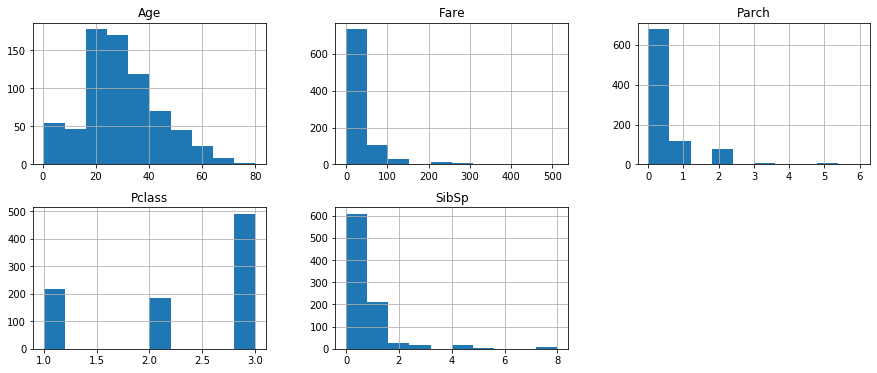

In [7]:
num_atts = ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass']
train_df[num_atts].hist(figsize = (15, 6),layout = (2, 3))

We can see that most of the passengers:

* were young (age < 40),
* boarded the ship alone (SibSp and Parch equal to 0),
* paid a low fare and boarded in the 3rd class.

Let's have a look at (almost) all attributes in greater detail.

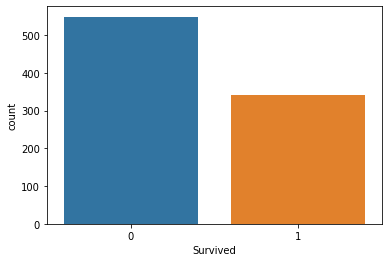

In [8]:
sns.countplot(x='Survived',data=train_df)

### 1.Gender

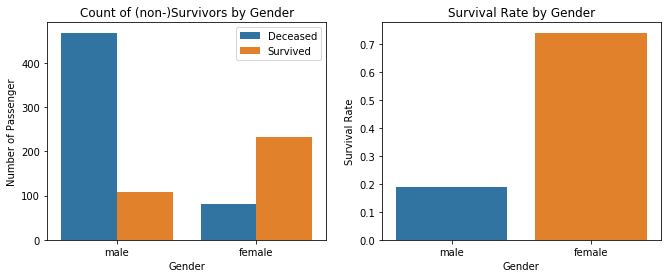

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (11, 4))
sns.countplot(x = 'Sex', hue = 'Survived', data = train_df,ax = ax1) 
ax1.set_title('Count of (non-)Survivors by Gender')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Number of Passenger')
ax1.legend(labels = ['Deceased', 'Survived'])

sns.barplot(x = 'Sex', y = 'Survived', data = train_df, ci = None, ax = ax2)
ax2.set_title('Survival Rate by Gender')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Survival Rate');

There were more men than women on board. However, more women survived the shipwreck (the survival rate is almost 75% for women compared to only 20% for men!).

### 2.Age

In [10]:
men = train_df[train_df['Sex']  == 'male']
women = train_df[train_df['Sex']  == 'female']

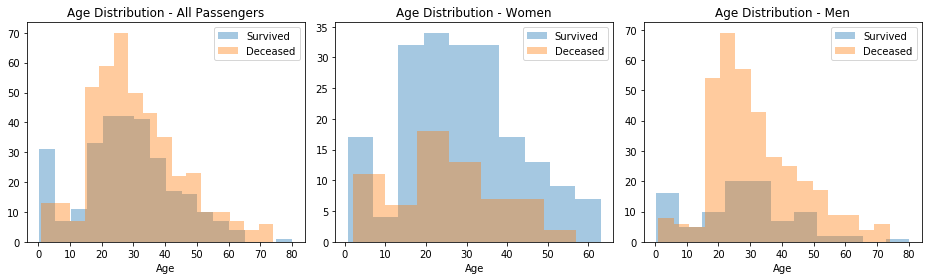

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (13, 4))

sns.distplot(train_df[train_df['Survived'] == 1]['Age'].dropna(),label = 'Survived', ax = ax1, kde = False)
sns.distplot(train_df[train_df['Survived'] == 0]['Age'].dropna(),label = 'Deceased', ax = ax1, kde = False)
ax1.legend()
ax1.set_title('Age Distribution - All Passengers')

sns.distplot(women[women['Survived'] == 1]['Age'].dropna(),label = 'Survived', ax = ax2, kde = False)
sns.distplot(women[women['Survived'] == 0]['Age'].dropna(),label = 'Deceased', ax = ax2, kde = False)
ax2.legend()
ax2.set_title('Age Distribution - Women')

sns.distplot(men[men['Survived'] == 1]['Age'].dropna(),label = 'Survived', ax = ax3, kde = False)
sns.distplot(men[men['Survived'] == 0]['Age'].dropna(),label = 'Deceased', ax = ax3, kde = False)
ax3.legend()
ax3.set_title('Age Distribution - Men')
plt.tight_layout()

It is evident that different age groups had very different survival rates. For instance, both genders display a higher probability of survival between the ages of 15 and 45. Also, the spike at young ages (0-4) shows that infants and young children have higher odds of survival.

### 3.Port of Embarkation

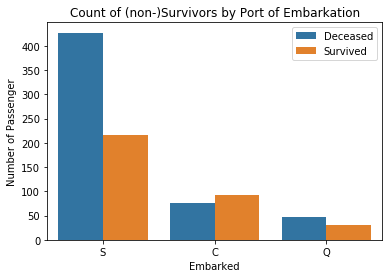

In [12]:
sns.countplot(x = 'Embarked', hue = 'Survived', data = train_df) 
plt.ylabel('Number of Passenger')
plt.title('Count of (non-)Survivors by Port of Embarkation')
plt.legend(['Deceased', 'Survived'])

Most passengers embarked from Southampton, the port from which the ship started its voyage. It has by far the highest count for both survivors and non-survivors. Cherbourg has the second largest number of passengers and interestingly, more than half of them survived.

Looking at the data, I wasn't confident that this attribute would be useful. After all, the ship sank at the same point and at the same time for all passengers so it doesn't really matter where they embarked.

### 4.Pclass

In [13]:
print ('Number of passengers in each class:')
train_df['Pclass'].value_counts()

Number of passengers in each class:


3    491
1    216
2    184
Name: Pclass, dtype: int64

Text(0, 0.5, 'Survival Rate')

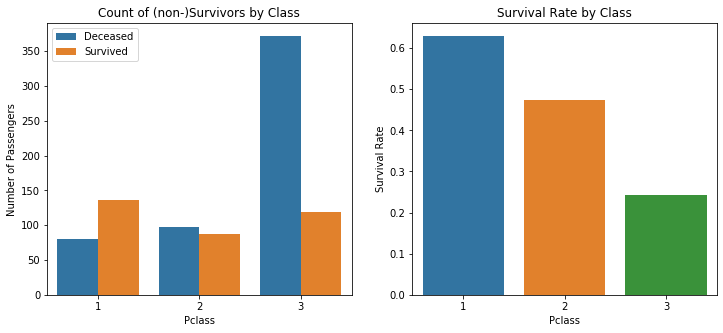

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

sns.countplot(x = 'Pclass', hue = 'Survived', data = train_df, ax = ax1) 
ax1.legend(['Deceased', 'Survived'])
ax1.set_title('Count of (non-)Survivors by Class')
ax1.set_ylabel('Number of Passengers')

sns.barplot(x = 'Pclass', y = 'Survived', data = train_df,ci = None, ax = ax2)
ax2.set_title('Survival Rate by Class')
ax2.set_ylabel('Survival Rate')

More than 50% of passengers boarded in the 3rd class. Nevertheless, survival favours the wealthy as shown in the right figure (the survival rate increases as we move from 3rd to 1st class)

### 5.Fare
One would assume that fare is closely related to class. Let's plot a boxplot for the distribution of Fare values across classes and a histogram for survival:

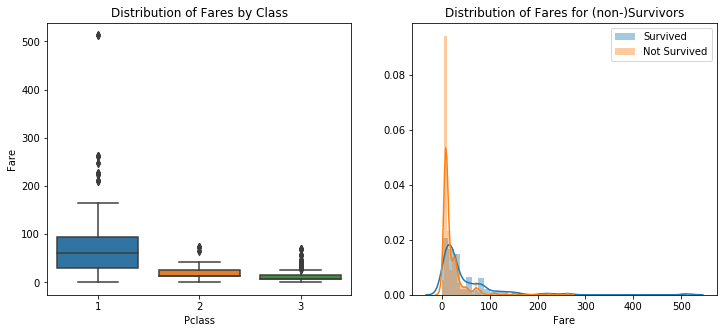

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

sns.boxplot(x = 'Pclass', y = 'Fare', data = train_df,ax = ax1)
ax1.set_title('Distribution of Fares by Class')

sns.distplot(train_df[train_df['Survived'] == 1]['Fare'], label = 'Survived', ax = ax2)
sns.distplot(train_df[train_df['Survived'] == 0]['Fare'], label = 'Not Survived', ax = ax2)
ax2.set_title('Distribution of Fares for (non-)Survivors')
ax2.legend();

It's not a surprise that people in class 1 paid more than the other two classes. As we already saw in the comparison of the classes, a higher fare leads to a higher chance of survival.

### 6.SibSp and Parch

Let's test if having relatives could influence a passenger's odds of surviving. 

In [16]:
alone = train_df[(train_df['SibSp'] == 0) & (train_df['Parch'] == 0)]
not_alone = train_df[(train_df['SibSp'] != 0) | (train_df['Parch'] != 0)]

Text(0, 0.5, 'Number of Passengers')

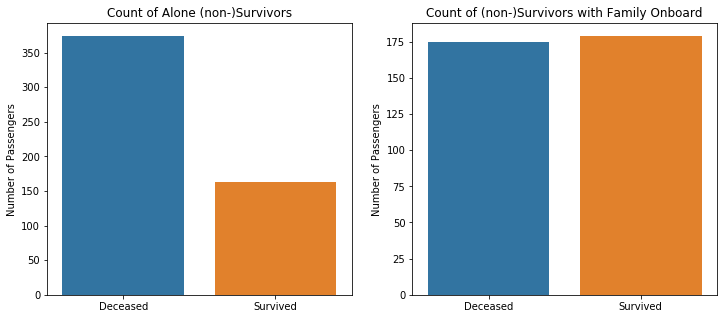

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

sns.countplot(x = 'Survived', data = alone, ax = ax1) 
ax1.set_title('Count of Alone (non-)Survivors')
ax1.set_xlabel('')
ax1.set_xticklabels(['Deceased', 'Survived'])
ax1.set_ylabel('Number of Passengers')

sns.countplot(x = 'Survived', data = not_alone,ax = ax2) 
ax2.set_title('Count of (non-)Survivors with Family Onboard')
ax2.set_xlabel('')
ax2.set_xticklabels(['Deceased', 'Survived'])
ax2.set_ylabel('Number of Passengers')

Having relatives on board increases your chances of survival.

### 7.Cabin

As we saw earlier, 77% in the training set have a missing value for 'Cabin'. Additionally, it has a large number of unique values among the existing (non-NaN) values:

In [18]:
print ('Cabin:\n  Number of existing values: ', train_df['Cabin'].notnull().sum())
print ('  Number of unique values: ', train_df['Cabin'].nunique())

Cabin:
  Number of existing values:  204
  Number of unique values:  147


Consequently, we can discard it.

#### Data Preprocessing


First, I will drop ‘PassengerId’ from the train set, because it does not contribute to a persons survival probability.

In [19]:
train_df = train_df.drop(['PassengerId'], axis=1)

Now let us replace missing values in 'Age' and 'Fare' with the mean and  median of the train set respecitively.

In [20]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
train_df['Fare'] = train_df['Fare'].fillna(train_df['Fare'].median())

Since the Embarked feature has only 2 missing values, we will just fill these with the most common one.

In [21]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [22]:
for i in train_df:
   train_df['Embarked'] = train_df['Embarked'].fillna('S')

We can now drop the cabin feature as most of its data is missing

In [23]:
train_df = train_df.drop(['Cabin'], axis=1)

Now let's check that heat map to see if thereis any missing values!

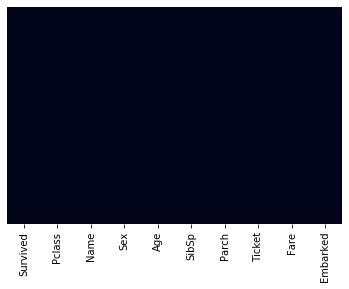

In [24]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False)

All missing values are treated!

#### Converting Categorical Features
We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [26]:
pd.get_dummies(train_df['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [27]:
sex = pd.get_dummies(train_df['Sex'],drop_first=True)
embarked = pd.get_dummies(train_df['Embarked'],drop_first=True)

In [28]:
train_df['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

Since the Ticket attribute has 681 unique tickets, it will be difficult to convert them into useful categories. So we will drop it from the dataset.

In [29]:
train_df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [30]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [31]:
train = pd.concat([train_df,sex,embarked],axis=1)

In [32]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


The data is ready for our model!

#### Building a Logistic Regression model
Let's start by splitting our data into a training set and test set

In [33]:
train.drop('Survived',axis=1).head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [34]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=100)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
y_predictions = logmodel.predict(X_test)

#### Model Performance Metrics

In [40]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
accuracy = accuracy_score(y_test, y_predictions)
f1 = f1_score(y_test, y_predictions)
precision = precision_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions)
roc_auc = roc_auc_score(y_test, y_predictions)

In [41]:
print('Accuracy is  :' ,accuracy)
print('F1 score is :' ,f1)
print('Precision is  :',precision)
print('Recall is  :',recall)
print('Roc Auc is  :',roc_auc)

Accuracy is  : 0.7910447761194029
F1 score is : 0.7227722772277227
Precision is  : 0.7849462365591398
Recall is  : 0.6697247706422018
Roc Auc is  : 0.7719693035600946


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       159
           1       0.78      0.67      0.72       109

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



We got 79 percentage accuracy in this model.